### Arsh Mittal
#### +919654035083
#### arshmittal16@gmail.com
#### Role: Data Science Intern

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
austin = pd.read_csv('listings.csv')

In [7]:
austin.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [8]:
austin.shape

(10272, 16)

In [9]:
# Dropping features which are irrelevant
austin.drop(columns = ['id', 'name', 'host_id', 'neighbourhood_group'], inplace = True)

In [10]:
austin.head()

,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Paddy,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,Paddy,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,Sylvia,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,Peggy,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


#### Question 1.
##### Top areas with highest number of listings

In [ ]:
## using functions 
austin.neighbourhood.value_counts().head()

78704    1822
78702    1263
78701     713
78741     622
78703     530
Name: neighbourhood, dtype: int64

In [ ]:
## from scratch
dic = {}

neigh = list(austin['neighbourhood'])

for i in range(len(neigh)):
  if neigh[i] not in dic:
    dic[neigh[i]] = 1
  else:
    dic[neigh[i]] += 1
    
keys = list(dic.keys())
vals = list(dic.values())
tp = list(dic.values())

tp.sort(reverse = True)

top_nei = []

for i in range(10):
  top_nei.append(keys[vals.index(tp[i])])

In [ ]:
top_nei

[78704, 78702, 78701, 78741, 78703, 78745, 78705, 78751, 78723, 78758]

##### Question 2
##### Thematic Maps

In [ ]:
!pip install geopandas

In [3]:
import geopandas as gpd

In [11]:
austin.room_type.value_counts()

Entire home/apt    7962
Private room       2166
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [22]:
entire = austin.loc[austin['room_type']=='Entire home/apt']
private = austin.loc[austin['room_type']=='Private room']

In [31]:
neigh = gpd.read_file('/content/neighbourhoods.geojson')

In [23]:
entire = pd.DataFrame(entire['neighbourhood'].value_counts())
private = pd.DataFrame(private['neighbourhood'].value_counts())

In [24]:
entire.columns = ['Entire']
private.columns = ['Private']

In [25]:
entire['neighbourhood']=entire.index
private['neighbourhood']=private.index

In [26]:
entire.reset_index(drop = True, inplace = True)
private.reset_index(drop = True, inplace = True)

In [17]:
neigh.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [28]:
neigh.neighbourhood = neigh.neighbourhood.astype(int)

In [29]:
df = pd.merge(neigh, entire, on = 'neighbourhood')

In [30]:
df = pd.merge(df, private, on = 'neighbourhood')

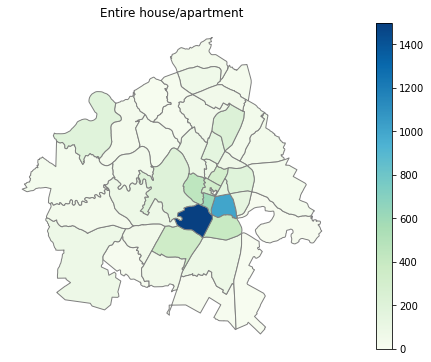

In [35]:
## Entire house/apartment Thematic Map
vmin, vmax = 0, 1500

fig, ax = plt.subplots(1, figsize=(14,6))
ax.set_title('Entire house/apartment')

df.plot(column='Entire', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.5')

ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

cbar = fig.colorbar(sm)

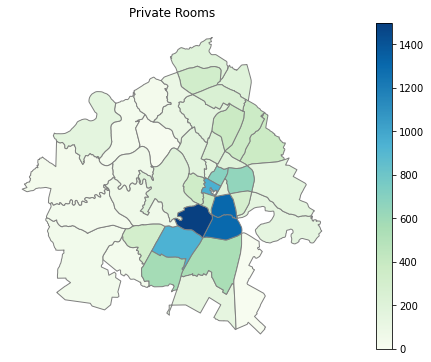

In [37]:
## Entire house/apartment Thematic Map
vmin, vmax = 0, 1500

fig, ax = plt.subplots(1, figsize=(14,6))
ax.set_title('Private Rooms')

df.plot(column='Private', cmap='GnBu', linewidth=1, ax=ax, edgecolor='.5')

ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

cbar = fig.colorbar(sm)

##### Question 3
##### Top 10 hosts by their total number of listings

In [ ]:
## using functions 
austin.host_name.value_counts().head(10)

Kia                         398
WanderJaunt                 131
TurnKey Vacation Rentals    124
Martin                      101
Michael                      98
David                        76
Sarah                        74
Ryan                         67
James                        62
Renters Club                 56
Name: host_name, dtype: int64

In [ ]:
## from scratch
dic = {}

host = list(austin['host_name'])

for i in range(len(host)):
  if host[i] not in dic:
    dic[host[i]] = 1
  else:
    dic[host[i]] += 1
    
keys = list(dic.keys())
vals = list(dic.values())
tp = list(dic.values())

tp.sort(reverse = True)

top_nei = []

for i in range(10):
  top_nei.append(keys[vals.index(tp[i])])

In [ ]:
top_nei

['Kia',
 'WanderJaunt',
 'TurnKey Vacation Rentals',
 'Martin',
 'Michael',
 'David',
 'Sarah',
 'Ryan',
 'James',
 'Renters Club']

##### Question 4
##### Insight/Metric

##### Metric I've chosen is average prices of various room_types in Austin's Airbnbs

In [39]:
austin.head()

,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Paddy,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,Paddy,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,Sylvia,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,Peggy,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [41]:
austin.room_type.value_counts()

Entire home/apt    7962
Private room       2166
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [60]:
entire = austin[austin['room_type'] == 'Entire home/apt'].loc[:, 'price']
private = austin[austin['room_type'] == 'Private room'].loc[:, 'price']
shared = austin[austin['room_type'] == 'Shared room'].loc[:, 'price']
hotel = austin[austin['room_type'] == 'Hotel room'].loc[:, 'price']

In [62]:
dic = {'Entire home/apt': sum(entire)/len(entire), 
       'Private Room': sum(private)/len(private),
       'Shared room': sum(shared)/len(shared),
       'Hotel room': sum(hotel)/len(hotel)}

In [72]:
avg_price = pd.DataFrame.from_dict(dic.items())

In [73]:
avg_price.columns = ['Room Type', 'Average Price']

In [74]:
avg_price

,Room Type,Average Price
0,Entire home/apt,297.384326
1,Private Room,112.047553
2,Shared room,68.894737
3,Hotel room,588.363636


##### According to the above data, Hotel Room is the most expensive while Shared Rooms are the cheapest.

##### End of Assignment/Notebook